In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#노트븍 안에 그래프 그리기
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 설치
plt.style.use('ggplot')

#그래프에서 마이너스 폰트 깨지는 것 방지
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(1458644, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
#명확해 보이는 outlier 제거
#시간 과도, 이동 x, passenger_count 7명 이상
train = train[ (train["trip_duration"] < 1500000)]
train = train[ (train["passenger_count"] < 7)]

In [14]:
#사분위수 중 25~75%만 추려보기
quantile_1 = train["trip_duration"].quantile(q = 0.25)
quantile_3 = train["trip_duration"].quantile(q = 0.75)
train = train[train["trip_duration"] > quantile_1]
train = train[train["trip_duration"] < quantile_3]

In [45]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

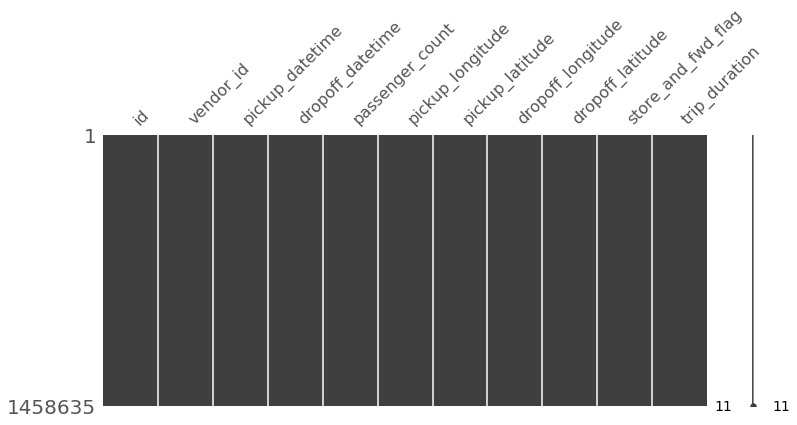

In [46]:
import missingno as msno
msno.matrix(train, figsize = (12, 5))

In [25]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
train["dropoff_datetime"] = pd.to_datetime(train["dropoff_datetime"])

train["pickup_day"] = train["pickup_datetime"].dt.day
train["dropoff_day"] = train["dropoff_datetime"].dt.day
train["pickup_hr"] = train["pickup_datetime"].dt.hour
train["dropoff_hr"] = train["dropoff_datetime"].dt.hour
train["pickup_min"] = train["pickup_datetime"].dt.minute
train["dropoff_min"] = train["dropoff_datetime"].dt.minute 
train["dayofweek"] = train["pickup_datetime"].dt.dayofweek

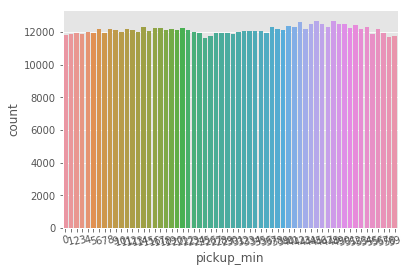

In [53]:
plt.xticks(rotation = 15)
sns.countplot(data = train, x = "pickup_min")

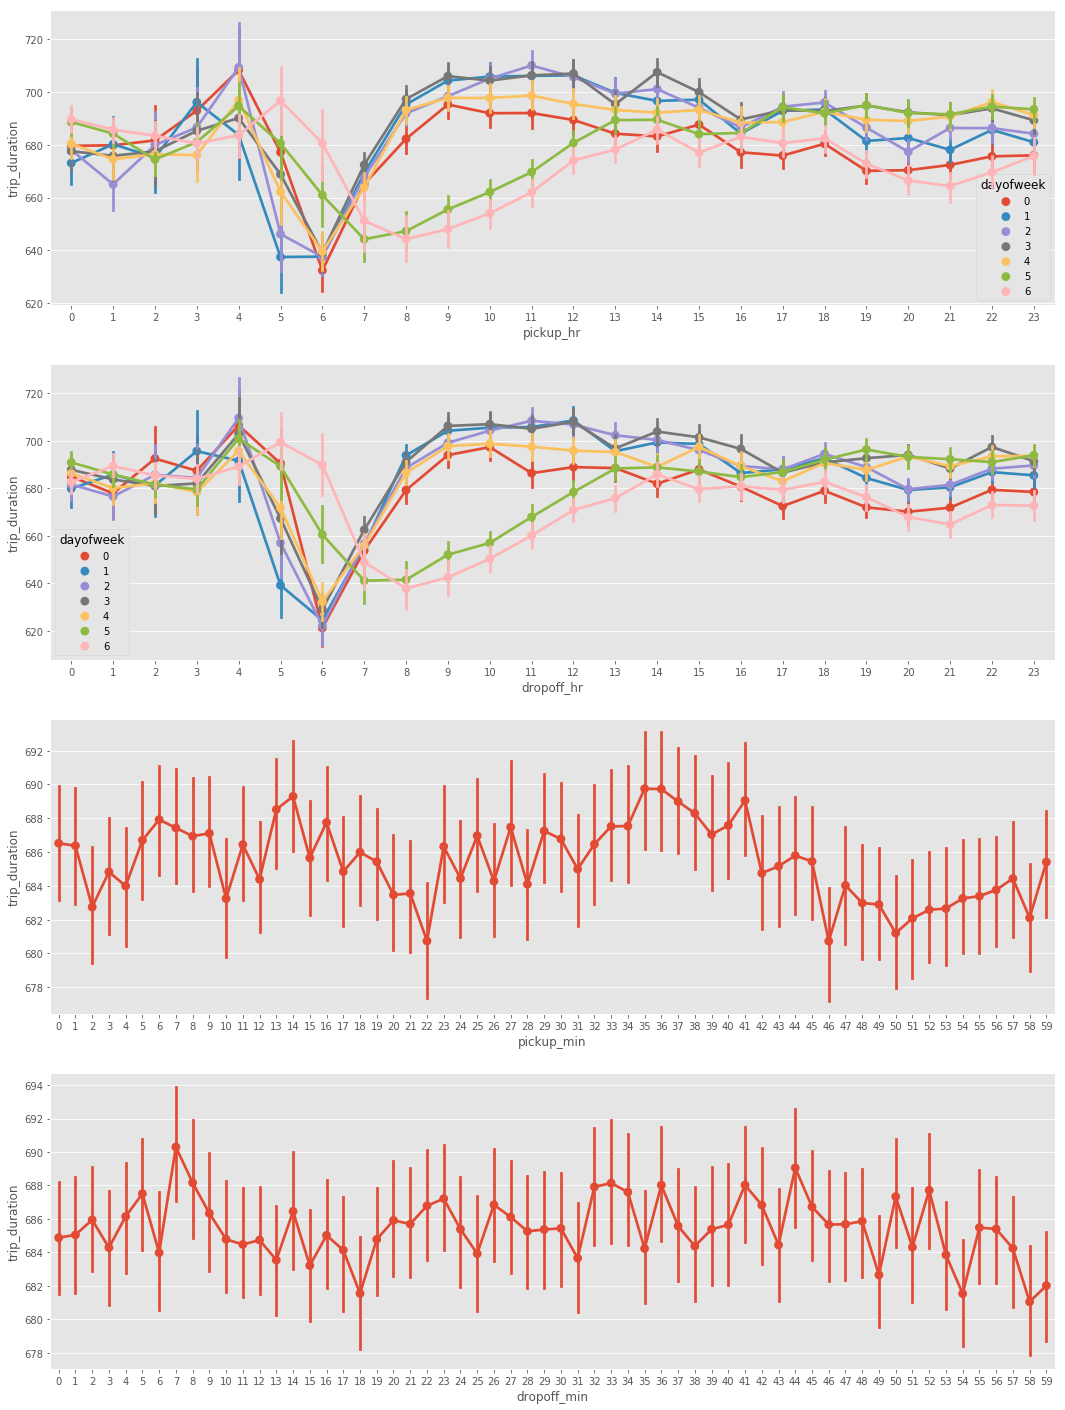

In [42]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4)
figure.set_size_inches(18, 25)

sns.pointplot(data = train, x = "pickup_hr", y = "trip_duration", hue = "dayofweek", ax=ax1)
sns.pointplot(data = train, x = "dropoff_hr", y = "trip_duration", hue = "dayofweek", ax=ax2)
sns.pointplot(data = train, x = "pickup_min", y = "trip_duration", ax=ax3)
sns.pointplot(data = train, x = "dropoff_min", y = "trip_duration", ax=ax4)


In [44]:
train["trip_duration"].describe()

count    728176.000000
mean        685.444544
std         188.735591
min         398.000000
25%         522.000000
50%         662.000000
75%         836.000000
max        1074.000000
Name: trip_duration, dtype: float64

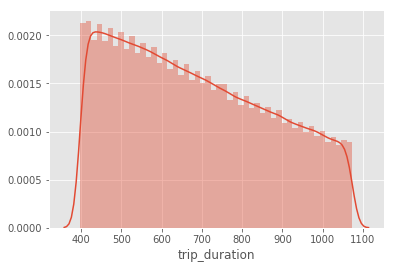

In [16]:
sns.distplot(train['trip_duration'])

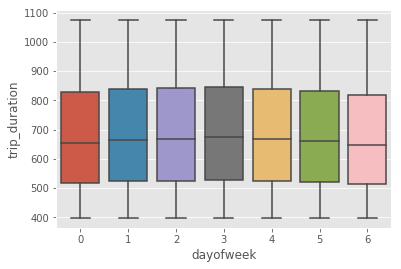

In [27]:
#요일별 trip_duration
sns.boxplot(data = train, y = "trip_duration", x = "dayofweek")

In [58]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_min,dropoff_min,dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,14,17,17,24,32,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,12,0,0,43,54,6
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,6,19,19,32,39,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,26,13,13,30,38,5
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,30,30,22,22,1,9,5


In [59]:
corrMatt = train[["trip_duration", "pickup_day", "dropoff_day", "pickup_hr", "dropoff_hr", "pickup_min", "dropoff_min", "dayofweek", "passenger_count", "vendor_id"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                 trip_duration  pickup_day  dropoff_day  pickup_hr  \
trip_duration         1.000000    0.004347     0.004416   0.012406   
pickup_day            0.004347    1.000000     0.998624  -0.000597   
dropoff_day           0.004416    0.998624     1.000000  -0.000388   
pickup_hr             0.012406   -0.000597    -0.000388   1.000000   
dropoff_hr            0.011598   -0.000836    -0.001140   0.945325   
pickup_min           -0.003794   -0.000615    -0.000426  -0.001315   
dropoff_min          -0.001456   -0.000334    -0.000536  -0.003318   
dayofweek            -0.008520    0.007324     0.007347  -0.095235   
passenger_count       0.004468    0.003328     0.003421   0.008082   
vendor_id             0.001601    0.000123     0.000149   0.008972   

                 dropoff_hr  pickup_min  dropoff_min  dayofweek  \
trip_duration      0.011598   -0.003794    -0.001456  -0.008520   
pickup_day        -0.000836   -0.000615    -0.000334   0.007324   
dropoff_day       -0.001140 

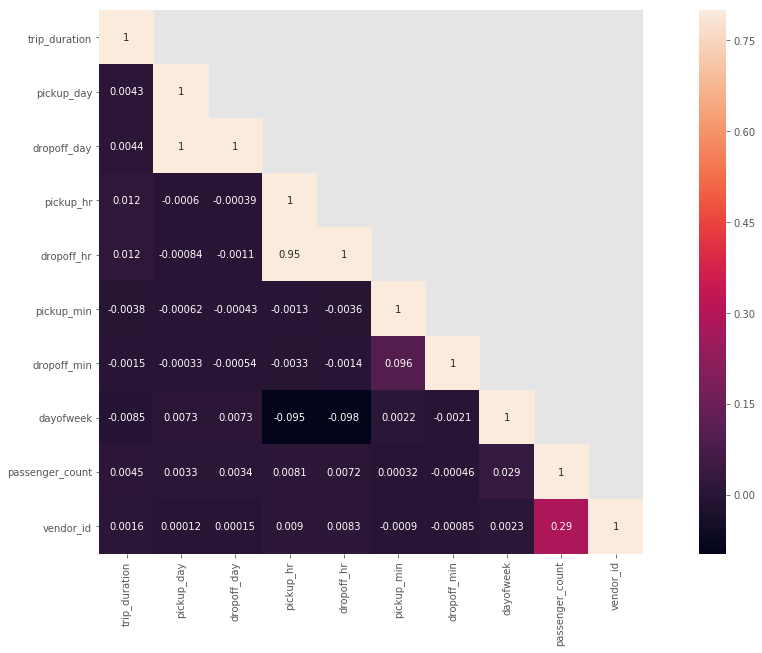

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

passenger 에 따른 vendor_id 분류해볼 것

In [69]:
train.pivot_table(index = "passenger_count", columns = "vendor_id", values = "trip_duration", aggfunc = sum)

vendor_id,1,2
passenger_count,,
0,2611.0,NaN
1,188293516.0,164769544.0
2,31788400.0,40457023.0
3,8046436.0,12727906.0
4,4170749.0,5576619.0
5,120568.0,26575122.0
6,46160.0,16549612.0


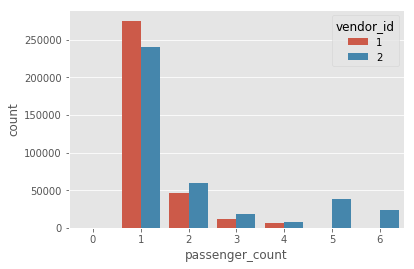

In [65]:
sns.countplot(data = train, x = "passenger_count", hue = "vendor_id")

5,6인승의 경우 vendor_id = 2 에 많이 탑승 -> 탑승 시간에는 큰 차이가 없으니 중요하지 않은건가?

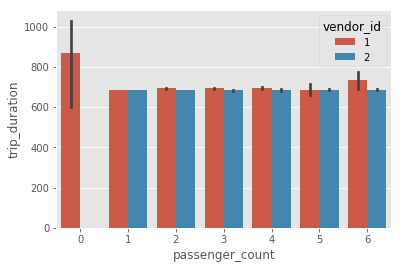

In [67]:
sns.barplot(data = train, y = "trip_duration", x = "passenger_count", hue = "vendor_id")

((array([-4.76337779, -4.58129144, -4.48277904, ...,  4.48277904,
          4.58129144,  4.76337779]),
  array([ 5.98645201,  5.98645201,  5.98645201, ...,  6.97914528,
          6.97914528,  6.97914528])),
 (0.27317213000542484, 6.4916778545879392, 0.98045883499125586))

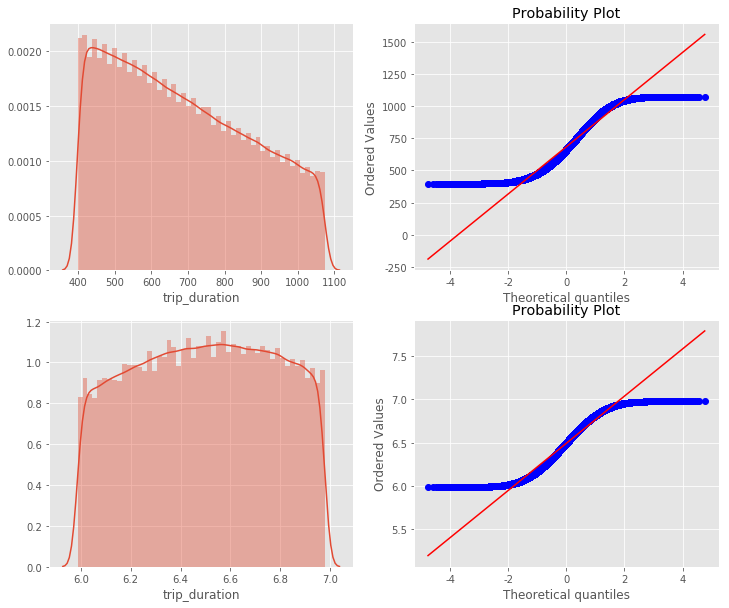

In [46]:
figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train["trip_duration"], ax = axes[0][0])
stats.probplot(train["trip_duration"], dist = "norm", fit = True, plot = axes[0][1])
sns.distplot(np.log(train["trip_duration"]), ax = axes[1][0])
stats.probplot(np.log(train["trip_duration"]), dist = 'norm', fit = True, plot = axes[1][1])

In [47]:
def rmsle(y, y_, convertExp = True) :
    if convertExp :
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [57]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_min,dropoff_min,dayofweek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,14,17,17,24,32,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,12,0,0,43,54,6
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,6,19,19,32,39,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,26,13,13,30,38,5
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,30,30,22,22,1,9,5


In [73]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [74]:
test = pd.read_csv("test.csv")
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

test["pickup_day"] = test["pickup_datetime"].dt.day
test["pickup_hr"] = test["pickup_datetime"].dt.hour
test["pickup_min"] = test["pickup_datetime"].dt.minute
test["dayofweek"] = test["pickup_datetime"].dt.dayofweek

In [75]:
#연속형 feature와 범주형 feature
categorical_feature_names = ["pickup_day", "pickup_hr", "pickup_min", "dayofweek"]

for var in categorical_feature_names :
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [76]:
feature_names = ["pickup_day", "pickup_hr", "pickup_min", "dayofweek" ]

feature_names

['pickup_day', 'pickup_hr', 'pickup_min', 'dayofweek']

In [87]:
x_train = train[feature_names]

print(X_train.shape)
x_train.head

(728176, 4)


<bound method NDFrame.head of         pickup_day pickup_hr pickup_min dayofweek
0               14        17         24         0
1               12         0         43         6
3                6        19         32         2
4               26        13         30         5
5               30        22          1         5
17              14         8         48         3
20              28         2         23         6
21               1        12         12         4
22               9         3         34         5
27              20        23          7         0
28              13        21         57         0
31              21        13          3         5
32              10        19         27         1
34               9        12         55         5
35              11         7         11         4
36               5        15         29         1
44              12         7         41         4
49              10        19         11         6
52              15  

In [88]:
x_test = train[feature_names]

print(X_test.shape)
x_test.head()

(728176, 4)


,pickup_day,pickup_hr,pickup_min,dayofweek
0,14,17,24,0
1,12,0,43,6
3,6,19,32,2
4,26,13,30,5
5,30,22,1,5


In [79]:
label_name = "trip_duration"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(728176,)


0    455
1    663
3    429
4    435
5    443
Name: trip_duration, dtype: int64

In [80]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values) :
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold  = KFold(n_splits = 10, shuffle = True, random_state = 0)



#### RandomForest

In [84]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators = 100,
                             n_jobs = -1,
                             random_state = 0)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [89]:
%time 

score = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = rmsle_scorer)

score = score.mean()

print("Score = {0:.5f}".format(score))

Wall time: 0 ns
Score = 0.31190


## Train

In [92]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
predicitions = model.predict(x_test)

In [97]:
submission = pd.read_csv("sample_submission.csv")

submission["trip_duration"] = predicitions

print(submission.shape)
submission.head()

ValueError: Length of values does not match length of index